In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('Simple_linear_regression.csv')

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Text(0, 0.5, 'GPA')

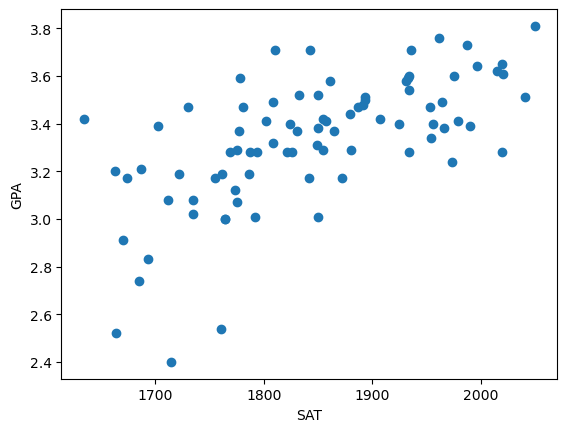

In [4]:
#scatter plot
plt.scatter(df['SAT'], df['GPA'])
plt.xlabel("SAT")
plt.ylabel("GPA")

In [5]:
#Correlation
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


C:\Users\SWARNIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


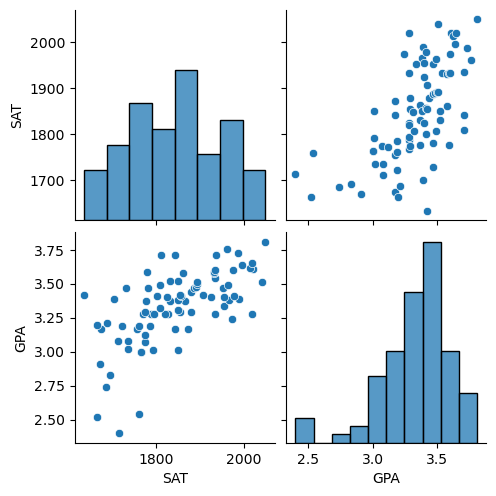

In [6]:
#Seaborn for visualization. It shows the correlation diagramatically.
import seaborn as sns
sns.pairplot(df)

In [7]:
# Independent and dependent features
X=df[['SAT']] #Independent feaure should be data frame or 2 dimension array
y=df['GPA'] #This variable can be in series form or 1D array


In [8]:
#Train Test Spilt
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) 

In [10]:
X_train.shape

(63, 1)

In [11]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.86221098],
       [-1.23579537],
       [-0.59685707],
       [-1.72215139],
       [-1.03553113],
       [ 0.85267459],
       [-1.03553113],
       [-0.01513713],
       [-1.43605961],
       [-0.11050106],
       [ 0.2041999 ],
       [ 1.07201161],
       [ 0.05161762],
       [ 1.36763978],
       [ 0.41400053],
       [ 0.33770939],
       [ 0.10883597],
       [ 1.46300371],
       [ 1.16737554],
       [ 1.29134864],
       [-0.65407543]])

In [14]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression(n_jobs=-1)

In [16]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [17]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [0.15541461]
Intercept: 3.3388888888888895


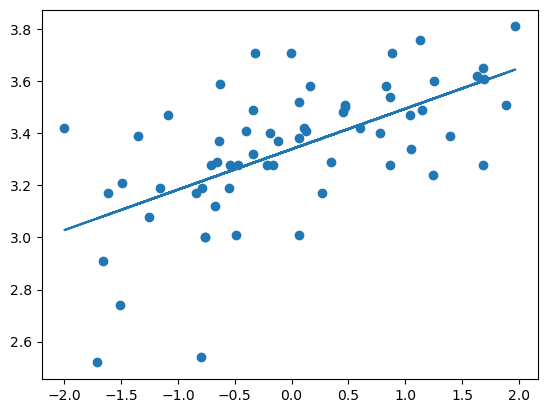

In [18]:
#Plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [54]:
#Prediction for test data
y_pred=regression.predict(X_test)

In [55]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.04587175782015942
0.15548838076312183
0.2141769311110779


In [57]:
from sklearn.metrics import r2_score

In [58]:
score=r2_score(y_test, y_pred)
print(score)

0.4851693872586669


In [59]:
# OLS Linear Regression
import statsmodels.api as sm

In [60]:
model=sm.OLS(y_train, X_train).fit()

In [61]:
prediction=model.predict(X_test)
print(prediction)

[ 0.13400018 -0.19206065 -0.09276031 -0.26764748 -0.16093666  0.13251808
 -0.16093666 -0.00235253 -0.22318464 -0.01717348  0.03173565  0.16660626
  0.00802213  0.2125512   0.06434173  0.05248497  0.0169147   0.22737214
  0.18142721  0.20069444 -0.10165287]


In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GPA   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                             0.1338
Date:                Sun, 03 Mar 2024   Prob (F-statistic):                       0.716
Time:                        12:24:17   Log-Likelihood:                         -165.47
No. Observations:                  63   AIC:                                      332.9
Df Residuals:                      62   BIC:                                      335.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
#Prediction for new data
regression.predict(scaler.transform([[1896]]))

C:\Users\SWARNIMA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.41656947])